# Projet Python 2A

In [ ]:
Image("logo_ensae.png")

# Analyse prédictive des cours des actions FAANG

Réalisé par :
* ESSOH Lasme Ephrem Dominique
* ELAOUNI Fouzia

# Introduction

La propagation du Covid-19 dans le monde continue de susciter maintes inquiétudes. Outre les conséquences humaines tragiques de la pandémie, le Covid-19 engendre aussi des incertitudes sur les marchés financiers mondiaux. De ce fait, nous examinerons dans ce notebook les données du marché boursier, en particulier celles des firmes technologiques. Plus précisement, nous ménons une analyse prédictive des cours des actions FAANG.  

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) ; et Alphabet ou Google (GOOG). Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# Modules utilisés

## Chargement

In [10]:
import numpy as np

import pandas as pd
from pandas_datareader.data import DataReader #pour récup. les datas sur yahoo finance !

import matplotlib.pyplot as plt
import seaborn as sns

import sys #
from datetime import datetime #gestion de dates
from IPython.display import Image

from scipy import stats

from sklearn.preprocessing import StandardScaler
#from keras.models import Sequential
#from keras.layers import Dense, LSTM

#import warnings
#warnings.filterwarnings('ignore')

## Installations

In [ ]:
!{sys.executable} -m pip install pandas_datareader
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install keras

# 1. Chargement et traitement des données

Nous utilisons le module <b>pandas_datareader</b> afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

In [ ]:
Image("img_yahoo_finance.png")

## 1.1. Récupération des données

### 1.1.1. Récupération des séries temporelles des cours des actions pour chacune des 5 firmes étudiées

Nous construisons une fonction de récupération des données, via Yahoo Finance par Scrapping à travers DataReader, sur les cours de actions de FACEBOOK, APPLE, AMAZON, NETFLIX et GOOGLE. Ensuite, nous constituons des données de panel à partir de cette récupération. Les paramètres de notre fonction sont essentiellements la date de début et la date de fin pour lesquelles on souhaite disposer des données.

In [11]:
def recup_donnees(date_debut, date_fin) :
    
    global nom_firme
    
    # liste des firmes de la tech
    FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

    # date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
    fin = date_fin
    debut = date_debut
    
    # récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
    for stock in FAANG :   
        globals()[stock] = DataReader(stock, 'yahoo', debut, fin)
    
    # constitution de notre panel de données
    liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
    nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

    for firme, nom in zip(liste_firme, nom_firme):
        firme["Nom firme"] = nom
    
    data = pd.concat(liste_firme, axis = 0)
    
    return data

### 1.1.2. Affichage des données de panel

Ci-dessous figure le jeu de données sur les douze derniers mois à partir du jour d'aujourd'hui. Par exemple, au jour du 10/12/2020 d'utilisation de ce notebook, les données couvrent la période allant du 10/12/2019 au 10/12/2020.

In [12]:
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)
data = recup_donnees(debut, fin)

In [13]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-13,196.800003,193.169998,196.399994,194.110001,18798000.0,194.110001,FACEBOOK
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
2019-12-17,199.000000,196.130005,198.839996,198.389999,10175700.0,198.389999,FACEBOOK
2019-12-18,204.300003,200.089996,200.089996,202.500000,23274400.0,202.500000,FACEBOOK
2019-12-19,206.300003,202.509995,202.779999,206.059998,16514600.0,206.059998,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980,GOOGLE
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005,GOOGLE


In [14]:
# liste des variables
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
Nom firme     object
dtype: object

### 1.1.3 Deux exemples du format des données

Nous avons récupéré au total 5 séries temporelles (celles de FB, de AAPL, de AMZN, de NFLX et de GOOG) que nous avons rassemblées pour constituer un panel de données. Chaque séries temporelles contient 5 variables :

* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj (en USD)
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj (en USD)
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj (en USD)
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)
* Volume = le volume total d'action négociés (transactions) au jour aaaa-mm-jj (en nombre absolu)
* Adj Close = la valeur ajustée (par rapport au dividendes) du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [15]:
#petite routine d'affichage des données d'une seule firme

def donnees_firme(nom_firme):
    return data.loc[data["Nom firme"] == nom_firme]

In [16]:
donnees_firme("FACEBOOK").sample(5)

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2020-10-26,285.230011,274.260010,283.160004,277.109985,21322900.0,277.109985,FACEBOOK
2020-11-12,279.750000,274.429993,277.179993,275.079987,12899500.0,275.079987,FACEBOOK
2020-12-02,291.779999,280.829987,285.359985,287.519989,17361600.0,287.519989,FACEBOOK
2020-09-23,257.989990,248.149994,255.259995,249.020004,19641300.0,249.020004,FACEBOOK
2020-07-23,242.419998,231.750000,239.630005,232.600006,21771800.0,232.600006,FACEBOOK


In [17]:
donnees_firme("APPLE").sample(5)

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2020-04-15,71.582497,70.157501,70.599998,71.107498,131154400.0,70.092110,APPLE
2020-01-27,77.942497,76.220001,77.514999,77.237503,161940000.0,75.954315,APPLE
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.771988,APPLE
2020-12-02,123.370003,120.889999,122.019997,123.080002,89004200.0,123.080002,APPLE
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,124.592552,APPLE


# 2. Statistique descriptive et visualisation

## 2.1. Niveau moyen des cours et du volume des actions négociés

In [18]:
vm_stock_2020 = round(data.groupby([(data.index.year), (data["Nom firme"])]).mean().loc[2020,:],2)
vm_stock_2020

,High,Low,Open,Close,Volume,Adj Close
Nom firme,,,,,,
AMAZON,2687.94,2612.51,2651.58,2651.40,4.999288e+06,2651.40
APPLE,94.76,92.02,93.37,93.45,1.470190e+08,92.92
FACEBOOK,235.86,228.69,232.24,232.46,2.275318e+07,232.46
GOOGLE,1484.77,1447.30,1464.78,1466.94,1.913517e+06,1466.94
NETFLIX,450.20,434.10,441.99,442.55,7.126442e+06,442.55


L'action AMAZON en moyenne a le cours le plus élevé en 2020 contrairement à l'action APPLE. Par ailleur l'action à Apple est la plus négocié en 2020 contrairement à GOOGLE.



## 2.2. Evolution du cours des actions journalières

Cette évolution sera appréciée à l'aide du graphe de la valeur ajustée du cours de l'action.

In [20]:
# création d'une fonction permettant de générer les graphes

def profil_temporel(var, dim_fig1, dim_fig2, subplot1, subplot2, pct = False):
    
    if pct == False:
        plt.figure(figsize=(dim_fig1, dim_fig2))
        plt.subplots_adjust(top=1.25, bottom=1.2)
        for i, nom in enumerate(nom_firme, 1):
            plt.subplot(subplot1, subplot2, i)
            firme = donnees_firme(nom)
            firme[var].plot()
            plt.ylabel(var)
            plt.xlabel(None)
            plt.title(nom)
    else:
        plt.figure(figsize=(dim_fig1, dim_fig2))
        plt.subplots_adjust(top=1.25, bottom=1.2)

        for i, nom in enumerate(nom_firme, 1):
            plt.subplot(subplot1, subplot2, i)
            firme = donnees_firme(nom)
            firme[var].pct_change().plot()
            plt.ylabel('Rendement')
            plt.xlabel(None)
            plt.title(nom)

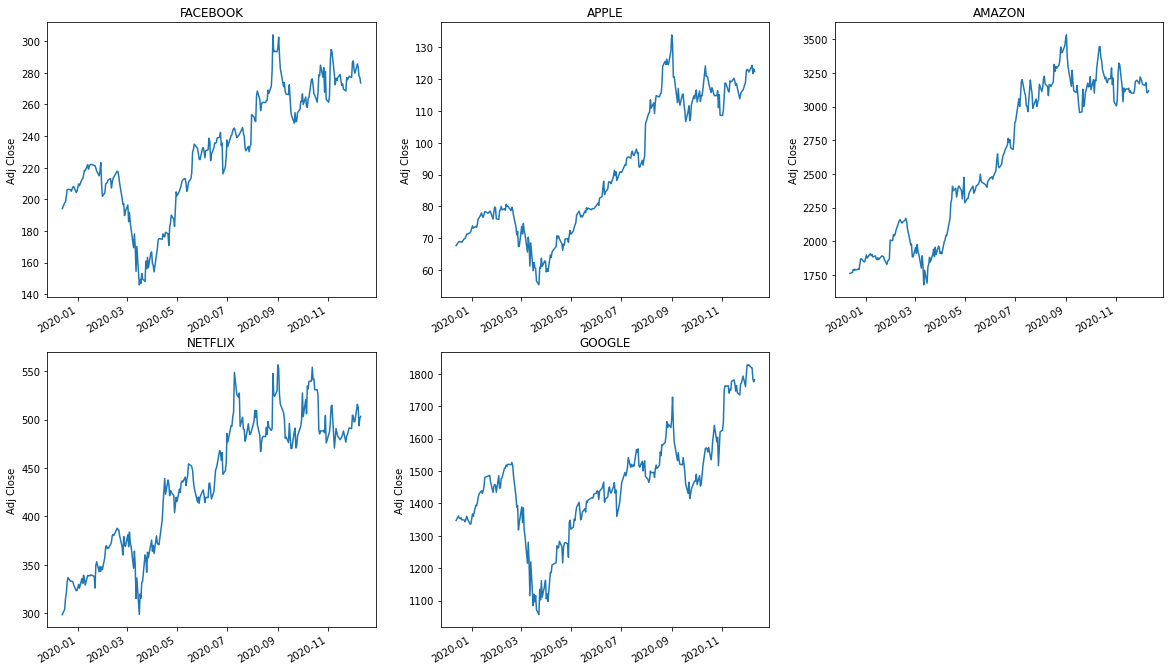

In [21]:
profil_temporel("Adj Close", 20, 8, 2, 3)

Dans, l'ensemble le cours des actions des différentes connait une tendance haussière avec des niveaux de hausse et de baisse sur les douze derniers moi. On remarque aussi une chute importante des cours des actions au mois de mars à cause de la crise pandémique (Covid 19). Par ailleurs, une note très forte variabilité de ces cours.

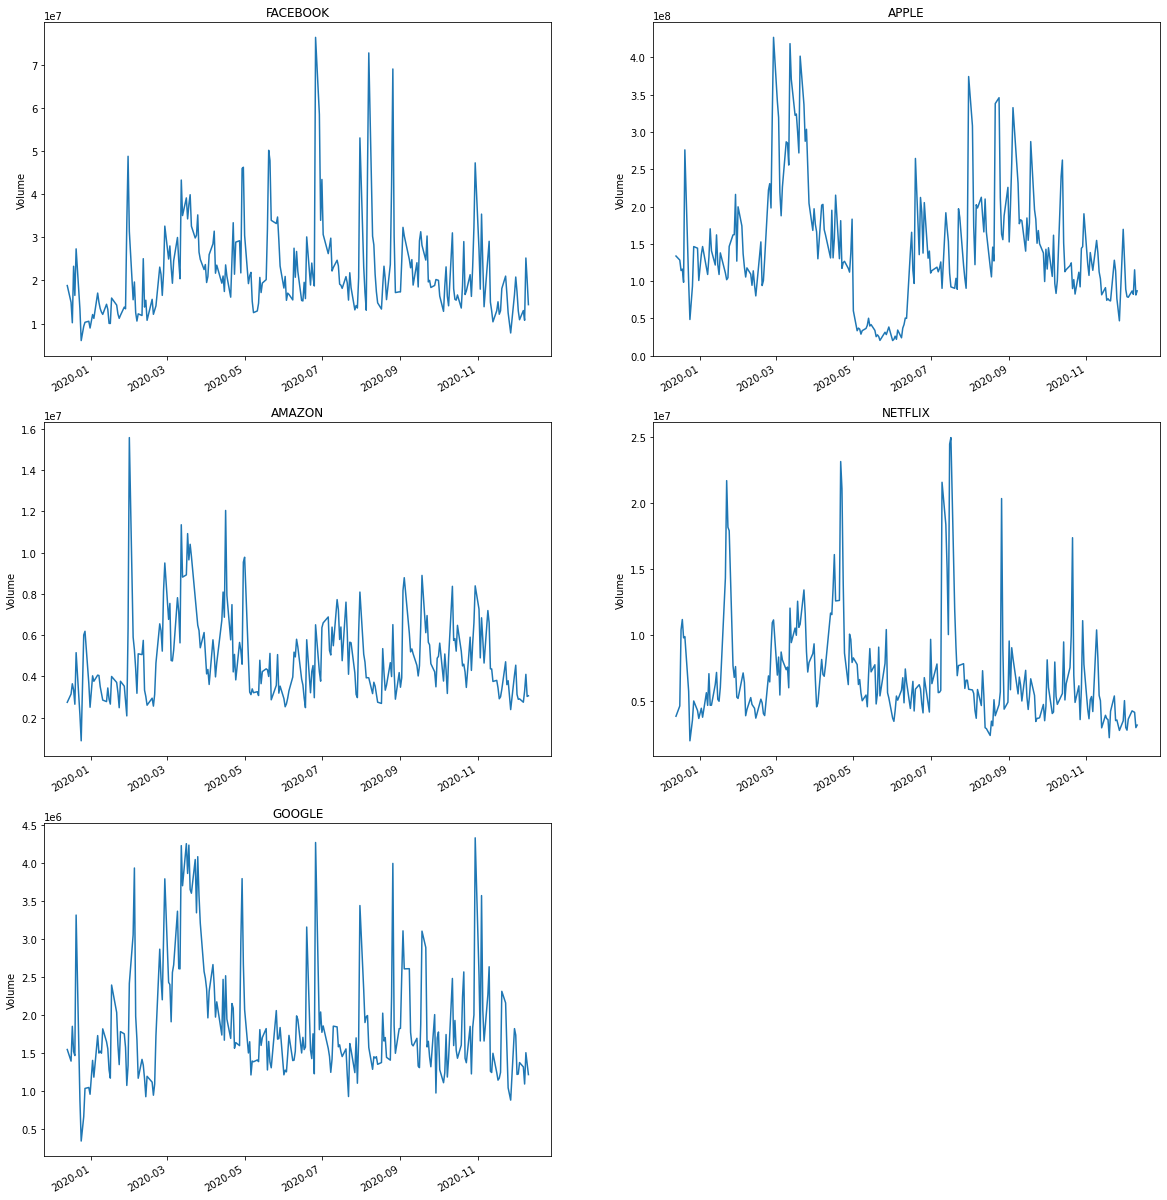

In [22]:
profil_temporel("Volume", 20, 15, 3, 2)

De même, on remarque que le volume des actions négociés fluctue fortement, il n'existe pas de tendance observable.

## 2.3. Le rendement

### 2.3.1. Cadre théorique 

La théorie de gestion de portefeuille s'appuie sur la notion du rendement qui mesure pendant un intervalle de temps donné l'appréciation ou la dépréciation relative de la valeur d'un actif donné où d'un portefeuille d'actifs.

Soit $x_t$ le cours de l’action X au jour t, le rendement simple n'est autre que
 $r^*_t=\frac{x_t-x_{t-1}}{x_{t-1}}$.
 
On notera aussi le log-rendement comme suit : $r_t={\mathrm{log} (\ \frac{x_t}{x_{t-1}}\ )\ }={\mathrm{log} (r^*_t+1\ \ )\ }$.

Le développement limité  de $r_t$ au voisinage de 0 donne :

$r_t={\mathrm{log} (r^*_t+1\ \ )\ }$ $\approx$ $r^*_t$.




### 2.3.2. Visualisation des rendements

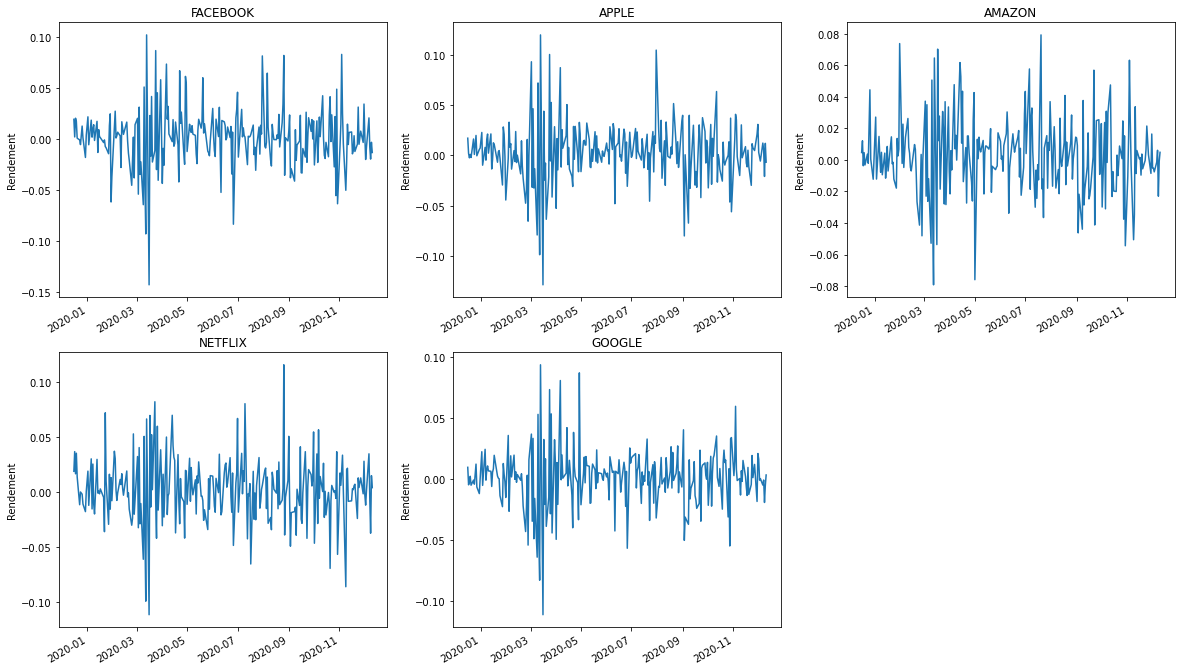

In [23]:
profil_temporel("Adj Close", 20, 8, 2, 3, True)

On remarque déjà l'absence de tendance dans la série rendement, avec grand choc au mois de mars à cause de la crise pandémique, ce qui était attendu !

### 2.3.3. Propriétés statistiques du processus des rendements

Passons à la vérifications de quelques propriétés statistiques de la série des rendements.

#### a. Stationnarité

<b> Rappel </b> : 
Un processus $y_t$ est faiblement stationnaire si :

- $E(y_t)=\mu$ canstante indépendante de $t$

- $Var(y_t)=\sigma^2 < \infty $

- $\gamma_t=cov(y_t,y_{t-1})$ ne dépends que de l'entier l

On tranchera sur la stationarité de la série des rendements avec un test de dickey-fuller :

<b> Test de dickey-fuller </b>  :

Soit $\Delta y_t = y_t-y_{t-1}=\alpha+\beta t +\gamma y_{t-1}+e_t$.

$H_0$ : $\gamma=0 , y_t$ s'agira d'une marche aléatoire.

$H_1$ :  $-1<1+\gamma<1$, on affirmera que $y_t$ est stationnaire.


In [30]:
from statsmodels.tsa.stattools import adfuller
for i, nom in enumerate(nom_firme, 1):
    firme = donnees_firme(nom)
    d=adfuller(firme['Adj Close'].pct_change().dropna(), maxlag=None, regression='c', autolag='AIC', store=False, regresults=True)
    print("p-value  ", nom , "=====>" , d[1] )

p-value   FACEBOOK =====> 3.4201723974713194e-05
p-value   APPLE =====> 3.4330066857604724e-05
p-value   AMAZON =====> 2.338252525476722e-30
p-value   NETFLIX =====> 0.0
p-value   GOOGLE =====> 0.0008513046580750298


Toutes les p-value sont inférieures à 5 % donc on rejette $H_0$, d'où les séries des rendements sont  stationnaires.

#### b. Normalité

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

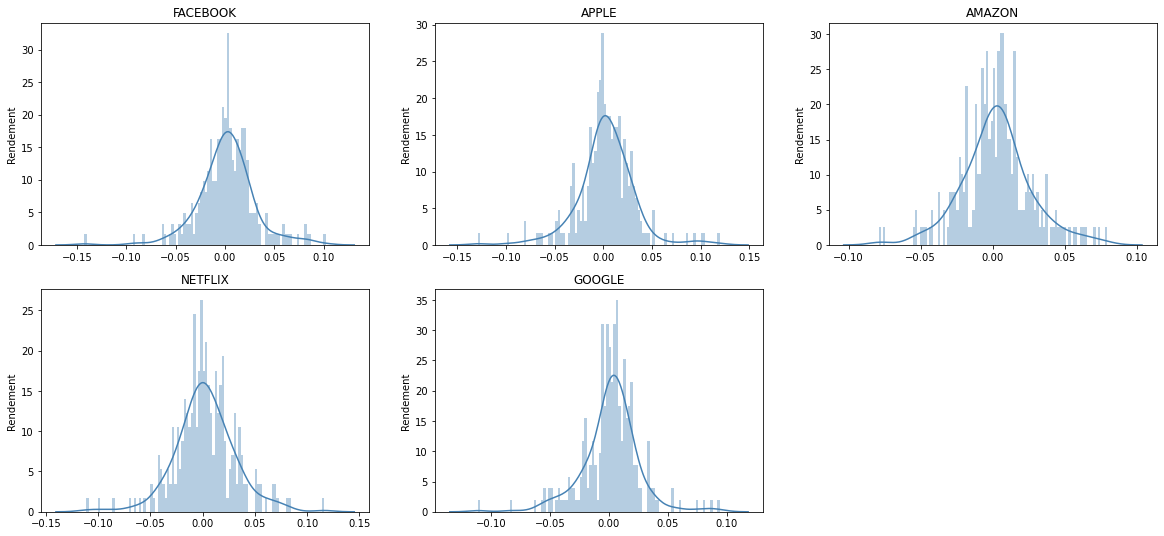

In [27]:
plt.figure(figsize=(20, 9))
for i, nom in enumerate(nom_firme, 1):
    plt.subplot(2, 3, i)
    firme = donnees_firme(nom)
    sns.distplot(firme['Adj Close'].pct_change().dropna(), bins=100, color='steelblue')
    plt.ylabel('Rendement')
    plt.xlabel(None)
    plt.title(nom)

Ces graphes montrent que les distributions de rendements des actions  ont des queues plus épaisses que les distributions normales comme mentionnées auparavant. Nous allons vérifier si les courbes de rendement des différents actions représentent la distribution gaussienne par le test de <a href = "https://fr.wikipedia.org/wiki/Test_de_Jarque-Bera"><b>Jacque-Bera</b></a>.

#### Test de Jarque-Bera.

$H_0$ $:$ " la distiribution suit une loi normale "

La statistique de Jaque-Bera est: $JB=\frac{n}{6}$$(S^2+\frac{(k-3)^2}{4})$

Cette statistique suit une loi de $\chi^2$ de degré de libérté 2.
  
Avec :

-$n$ le nombre d'observations 

-$coef f d'assymétrie=S=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^3}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^{\frac{3}{2}}}$

-$coef f d'applatissement=k=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^4}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^2}$


   
Nous utilisons le module stats de scipy pour réaliser le test de Jarque-Bera.

In [28]:
for i, nom in enumerate(nom_firme, 1):
    firme = donnees_firme(nom)
    x = firme['Adj Close'].pct_change().dropna()
    print("JB ", nom, "=====>" ,stats.jarque_bera(x) )

JB  FACEBOOK =====> Jarque_beraResult(statistic=126.05171655529178, pvalue=0.0)
JB  APPLE =====> Jarque_beraResult(statistic=150.36996923152202, pvalue=0.0)
JB  AMAZON =====> Jarque_beraResult(statistic=14.695407151380397, pvalue=0.0006440697207470425)
JB  NETFLIX =====> Jarque_beraResult(statistic=44.74738822564971, pvalue=1.9196766398721365e-10)
JB  GOOGLE =====> Jarque_beraResult(statistic=142.6923845256435, pvalue=0.0)


On rejete $H_0$ pour les 5 actions puisque toutes les p-values sont  inférieures à 5 %. Donc nous sommes loin de distribution normale. 

## 2.4. Le risque

### 2.4.1.  Le cadre théorique

Le risque du marché d’un portefeuille provient des variations des cours des actifs financiers et de leur effet négatif sur la valeur financière totale du portefeuille. Traduit en terme de rendement, les rentabilités des actifs deviennent alors des variables aléatoires dont l’évolution future n’est pas, à priori, connue et quantifiable. Dans le cas des actions on distingue entre le risque systémique du marché et le risque spécifique de chaque action. 

Exemple : 

Risque systémique : La crise de covid-19

Risque spécifique : Liquidation de l’entreprise X 

Dans son modèle de moyenne-variance.  <a href = "https://fr.wikipedia.org/wiki/Harry_Markowitz"> Markowitz </a> a utilisé la variance des rendements pour mesurer le risque car celle-ci présente des propriétés statistiques qui permettent d’expliciter la variance d’un portefeuille à partir des risques individuelles des actions qui le compose :

$${{\sigma }_{p\ }}^2~~=\sum_j{w_j\ {{\sigma }_{j\ }}^2}-2\sum_i{\sum_j{w_i\ w_j\ {\rho }_{i,j}\ {\sigma }_i}}$$

Avec:

- ${{\sigma }_{p\ }}^2~$: La variance des rendements moyens du portefeuille ( la volatilité)

- ${{\sigma }_{i\ }}^2~$: La variance des rendements moyens de l'action i ( la volatilité)

- $w_i$ : Le poids de chaque action dans le portefeuille 

- ${\rho }_{i,j}$ : La corrélation linéaire entre l'action i et j 

Le probléme de l'investisseur c'est de choisir les poids qui minimisent ce risque (i.e. $\sigma_p$) sous contrainte d'une rentabilité donnée.
 
\begin{array}{c}
{\mathrm{min\ \ \ \ \ } \ \ \ \ \ \ {\sigma }_{p\ }\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ } \\ \ \ \ \ \
sc.\ \ \ \ \ \ \ \ \ \ \ \ \ \ W^T\ R=R_p\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \\ 
\ \  W^T\ \mathrm{l}=1\ \ \ \ \ \ \  \end{array}



Avec $R$ le vecteur des rendements moyens (rentabilité) et $W$ le vecteur des poids.

### 2.4.2. Corrélation des actions 2 à 2

In [31]:
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)
Matcours = DataReader(FAANG, 'yahoo', debut, fin)['Adj Close']
Matrend = Matcours.pct_change()
Matrend.tail()

Symbols,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2020-12-07,0.021022,0.012270,-0.001448,0.035059,-0.004655
2020-12-08,-0.007634,0.005091,0.006108,-0.006049,-0.000511
2020-12-09,-0.019337,-0.020904,-0.023004,-0.037179,-0.018927
2020-12-10,-0.002879,0.011989,-0.000873,0.015174,-0.004932
2020-12-11,-0.012883,-0.006735,0.004814,0.004251,0.003628


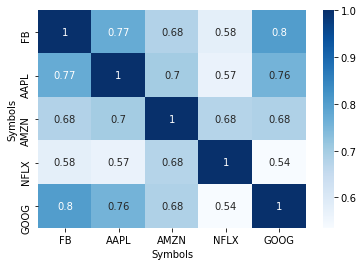

In [32]:
Matrend.corr()
sns.heatmap(Matrend.corr(), annot=True, cmap='Blues')
plt.show()

Plus le corrélations entre les variables sont proches de 1 moins il est intéressant pour les investissuers de diversifier leurs portefeuilles.

La forte corrélation entre les différentes actions était prévisible puisque en 2020 les 5 actions de FAANG ont subit presque les mêmes chocs à cause des conséquences de la crise pandémique.

### 2.4.3. Le risque et la rentabilité

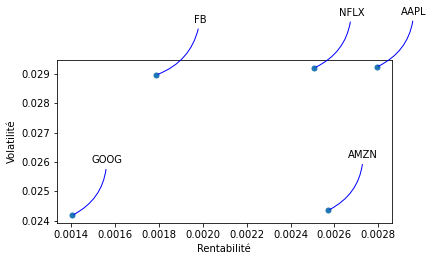

In [33]:
# On classe ces 5 actions en tremes de volatilité (le risque)
# Suppression des valeurs manquantes
Matrendvola = Matrend.dropna()
# Création de la figure 
area = np.pi*20
plt.figure(figsize=(6, 3))

plt.scatter(Matrendvola.mean(),Matrendvola.std(),s=25)

plt.xlabel('Rentabilité')
plt.ylabel('Volatilité')

for label,x,y in zip(Matrendvola.columns,Matrendvola.mean(),Matrendvola.std()):
   plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


D'après ce graphe on remarque que google était l'actif le moins risqué et le moins rentable contrairement à Apple. 
Par ailleurs, Google et Amazon partagent le même risque ; De même, pour Facebook, Netflix et Apple. 

# 3. Modélisation

Nous souhaitons prédire le cours ajustées des actions des FAANG  à la fermeture du marché boursier. Différents types de modèles possibles peuvent être employés : des modéles de séries temporelles linéaires de type ARIMA, ARCH, GARCH, ... ou encore des modèles d'apprentissage statistique de type réseau de neurones. Nous employons ici un modéle de prédiction du deuxième type, plus précisement nous mettons en place un modèle de réseau de neurones récurrents (RNN) afin de modéliser le cours des actions des FAANG. L'idée est de réproduire autant que possible la variabilité à haute fréquence du cours de ces actions. Ainsi, un modèle d'apprentissage de réconnaissance de séquences (ici nos données temporelles) pourrait être préférable. De ce fait, nous développons dans la classe des RNN, un réseau Long short-term memory (LSTM). Notons que notre objectif n'est pas de comparer diverses classes de modèles, mais plutôt de proposer un modèle qui réprésente au mieux les données avec de bonnes performances de généralisation.  

### 3.1 Qu'est-ce-que le LSTM ?

##### Le Deep Learning

Le Deep Learning (DL) est le sous-domaine du Machine Learning (ML) qui traite de la construction, de l'architecture et l'implémentation de modèles prédictifs basés sur des réseaux de neuronnes artificiels. 

##### Les réseaux de neurones artificiels, piliers du Deep Learning

Pour la résolution de ses problèmes, le DL fait appel aux réseaux de neurones artificiels. Les réseaux de neurones artificiels, formalisme mathématique des réseaux de neurones bilogiques, utilisent des entrées $\vec{X}$ qu'ils transforment, à l'aide réprésentation non linéaire, en sorties $\vec{y}$ via une architecture bien spécifique.

#####  L'architecture feed-forward

Il s'agit d'un réseau de neurones dans lequel il existe trois niveaux de réprésentation des données : la couche d'entrée, les couches cachées et la couche de sortie. La couche d'entrée est celle qui contient les prédicteurs ou features ou variables d'entrées. Ces features sont ensuite combinées linéairement puis transformées via une fonction non linéaire, dite d'activation, afin d'être connectées aux neurones d'une couche cachée. Le même principe est alors repété d'une couche cachée à une autre tant que l'on souhaite produire autant que possible de la non linéairité dans nos transformations. Enfin, le résultat de la dernière couche cachée est achéminé vers une couche de sortie, toujours par le bias de combinaison lineaire + d'une fonction d'activation, afin de produire une prédiction. 

In [ ]:
Image("img_rna.png")


Le challenge du modélisateur est de trouver le nombre de couche cachées adéquat pour l'apprentissage d'un tel réseau de neurones : il faudra éviter autant que possible le surapprentissage.

On peut par exemple utiliser un réseau de neurones feed-forward afin de prédire le label d'un target cible pour lequel on dispose d'un jeu de données d'entrainement annotés : <a href = "https://nextjournal.com/gkoehler/digit-recognition-with-keras"> L'exemple du MNIST</a>.

En réalité, les réseaux de neurones feed-forward conviennent pour le traitement de problématique où le jeu de données d'entrainement est constitué d'observations indépendantes les unes des autres. Que faire alors si ces observations sont séquentielles (séquences de mots) ou temporelles (nos séries temporelles du cours des actions par exemple) ? 

Il faut alors utiliser une autre architecture de réseaux de neurones. Bien souvent, on utilise la classe des réseaux de neurones dits récurrents.

##### L'architecture recurrent neural network

Les réseaux de neurones récurrents permettent modéliser des données séquentielles (et donc des séries temporelles). Dans ces réseaux la sortie d'un neurone d'une couche cachée, au lieu d'être directement transmise à couche suivante, peut être sauvegardée par le neurone afin de produire des dépendances entre ses sorties nouvelles et ses sorties passées : les neurones d'une couche cachée réalisent une sorte de boucle (récurrence) sur elles-mêmes afin de prendre en compte l'information passée. Ainsi ces neurones, contenant un mécanisme de sauvegarde, sont assimilables à des cellules mémoires. Et une cellule suivant le type de réseau de neurones récurrent possède elle-même une artitecture différente.

In [ ]:
Image("img_rnn.png")

##### L'architecture LSTM

Le figure que nous présentons ci-dessous est extraite de <a href = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"> l'article</a> de Christopher Olah, lequel article que nous pensons décrire au mieux et simplement la logique derrière le réseau de neurone LSTM. Au risque de recopier cet article, nous invitons le lecteur cliquer <a href = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"> sur le lien hypertexte</a>.

In [ ]:
Image("img_lstm.png")

### Implémentation de notre LSTM

In [ ]:
def LSTM_FAANG(nom_firme, longeur_apprentissage) :
    
################### DONNEES + FEATURE PREPROCESSING ###########################################################################
    
    nom_de_la_firme = nom_firme

    #récupération de beaucoup de données de t'entrainement
    debut = longeur_apprentissage
    fin = datetime.now()
    data = recup_donnees(debut, fin)
    df = donnees_firme(nom_firme).iloc[:,:6]


    #extraction du target et conversion en matrice de valeurs numpy
    dataset = df.filter(['Adj Close']).values


    #normalisation des données
    scaler = StandardScaler()
    dataset_normalisee = scaler.fit_transform(dataset)




    #création jeu d'entrainement

    #obtention du nombre de ligne du jeu d'entrainement
    longueur_training_data = int(np.ceil( len(dataset) * .8 ))

    #création du jeu d'entrainement à partir des données normalisées
    train_data = dataset_normalisee[0:int(longueur_training_data), :]

    #séparation en (x_train, y_train) du jeu d'entrainement
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    #passage en matrice de valeurs numpy 
    x_train, y_train = np.array(x_train), np.array(y_train)

    #reshape des données pour l'apprentissage
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))




    #création jeu de test

    #création du jeu d'entrainement à partir des données normalisées
    test_data = dataset_normalisee[longueur_training_data - 60: , :]

    #séparation en (x_test, y_test) du jeu d'entrainement
    x_test = []
    y_test = dataset[longueur_training_data:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    #passage en matrice de valeurs numpy
    x_test = np.array(x_test)

    #reshape des données pour l'apprentissage
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
    
    print("*** Le preprocessing des données de ", nom_firme, " a bien été éffectué !")    
    

    
################### CONSTRUCTION ET ENTRAINEMENT DU MODELE LSTM #############################################################

    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(100, return_sequences= False))
    model.add(Dense(25))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    
    print("*** L'entrainement du modèle LSTM a bien été éffectué sur les données de", nom_firme)

    

    
################### EVALUATION DU MODELE #############################################################

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

    print("*** L'erreur quadratique moyenne (racine carrée) est de : ", rmse, " sur le jeu de données de", nom_firme)

    

    
################### VISUALISATION DU MODELE #############################################################

    dat = df.filter(['Adj Close'])
    train = dat[:longueur_training_data]
    valid = dat[longueur_training_data:]
    valid['Predictions'] = predictions
    print("*** Visualisation des résultats :")
    plt.figure(figsize=(10,6))
    plt.title(nom_de_la_firme)
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Adj close ($)', fontsize=13)
    plt.plot(train['Adj Close'])
    plt.plot(valid[['Adj Close', 'Predictions']])
    plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
    plt.show()

### Résultats LSTM

In [ ]:
LSTM_FAANG("FACEBOOK", "2010-01-01")

# Conclusion